In [3]:
import numpy as np #다차원 배열 => numpy 용이
vector = np.array([1,2,3,4,5])
row_vector = vector.reshape((5,1))
column_vector = vector.reshape((1,5))
single_feature_matrix = vector.reshape((1,5)

In [17]:
#다중행렬 만드는 방법
multiple_feature_matrix = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
multiple_vector = np.array([i for i in range(1,16)])
multiple_vector = multiple_vector.reshape((3,5))

In [19]:
#영행렬,일행렬 만들기
all_zeros = np.zeros((5,3))
all_ones = np.ones((5,3))
all_zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
#데이터 다운
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.mlab as mlab
import math
import scipy.stats as scs
%matplotlib inline

In [28]:
dataset = pd.DataFrame(boston.data,columns = boston.feature_names) #데이터 처리하기 편한 df로 바꿔줌
dataset["target"] = boston.target
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


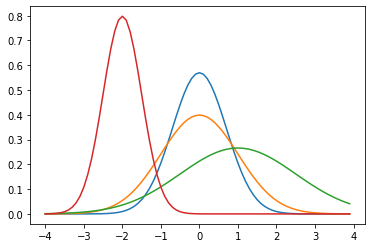

In [38]:
x = np.arange(-4,4,0.1)
for mean, variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    plt.plot(x,scs.norm.pdf(x,mean,variance))

In [40]:
mean_expected_value = dataset["target"].mean()
mean_expected_value

22.532806324110698

Sum of Squared Errors(SSE): 42716


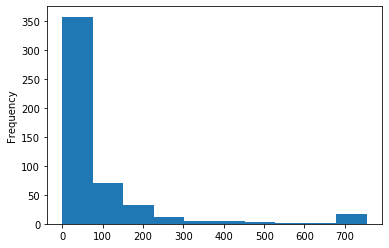

In [49]:
#정규성 때문에 오차 측정
SS  = pd.Series(mean_expected_value - dataset["target"])**2
SSE = np.sum(SS)
print("Sum of Squared Errors(SSE): %01.f" % SSE)
density_plot = SS.plot(kind = 'hist')
plt.show()

In [54]:
from scipy.stats.stats import pearsonr
print("Correlation from Scipy pearsonr estimation: %0.5f" % pearsonr(dataset["RM"],dataset["target"])[0])

Correlation from Scipy pearsonr estimation: 0.69536


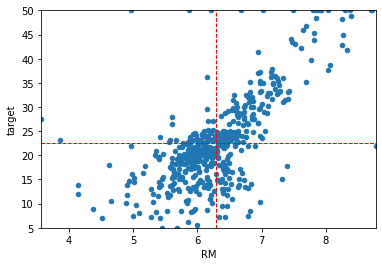

In [56]:
#선형성 확인 => scatterplot 그리고 4분면 확인하기
x_range = [dataset["RM"].min(),dataset["RM"].max()]
y_range = [dataset["target"].min(), dataset["target"].max()]
scatter_plot = dataset.plot(kind="scatter", x="RM",y="target",xlim=x_range, ylim = y_range)
meanY = scatter_plot.plot(x_range, [dataset["target"].mean(),dataset["target"].mean()],"--",color="red",linewidth=1)
meanX = scatter_plot.plot([dataset["RM"].mean(),dataset["RM"].mean()],y_range,"--",color="red",linewidth=1)

In [57]:
#선형회귀로의 확장
    #statsmodels 써서 선형 회귀 만들어주기
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
y = dataset["target"]
X = dataset["RM"]
X = sm.add_constant(X)

linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           2.49e-74
Time:                        09:42:26   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
print(fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


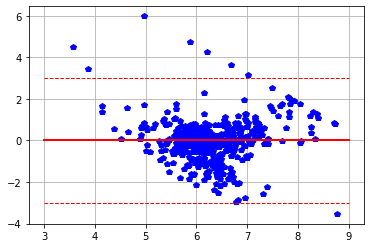

In [62]:
#잔차 분석
residuals = dataset["target"]-fitted_values
normalized_residuals = standardize(residuals)

residual_scatter_plot = plt.plot(dataset["RM"], normalized_residuals, "bp")
mean_residual = plt.plot([int(x_range[0]), round(x_range[1],0)], [0,0], "-", color="red", linewidth=2)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1],0)], [3,3], "--", color="red", linewidth=1)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1],0)], [-3,-3], "--", color="red",linewidth=1)
plt.grid()
plt.show()

In [63]:
#잔차 결과해석
    #-3,3 넘는 이상치 잔차들이 있어 선형회귀분석의 성능을 떨어뜨린다
    #잔차가 산발적으로 나타나고 있지않음 => 방의 갯수 뿐만 아니라 다른 변수의 영향도 있기 때문

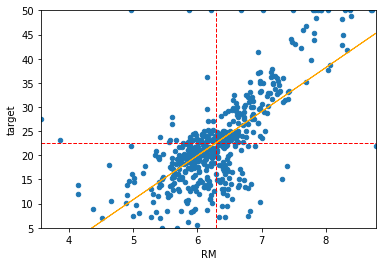

In [64]:
x_range = [dataset["RM"].min(),dataset["RM"].max()]
y_range = [dataset["target"].min(),dataset["target"].max()]
scatter_plot = dataset.plot(kind = "scatter", x = "RM", y="target",xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset["target"].mean(),dataset["target"].mean()], "--", color="red",linewidth=1)
meanX = scatter_plot.plot([dataset["RM"].mean(),dataset["RM"].mean()], y_range, "--", color="red",linewidth=1)
regression_line = scatter_plot.plot(dataset["RM"], fitted_values, "-", color="orange", linewidth=1)
plt.show()

In [67]:
#sckit-learn 이용해서 선형 회귀 모델 작성해보기
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [68]:
observations = len(dataset)
X = dataset["RM"].values.reshape((observations,1))
y = dataset["target"].values

In [69]:
linear_regression.fit(X,y)

print(linear_regression.coef_)
print(linear_regression.intercept_)

[9.10210898]
-34.67062077643857
